## Alternative assignment

Here you can find an alternative assignment notebook which does not require py2 or a physical screen.

For starters, please go to __qlearning.py__ file in the current folder and implement q-learning agent by following instructions in the file.

In [1]:
#XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY"))==0:
    !bash ../xvfb start
    %env DISPLAY=:1

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output

bash: ../xvfb: No such file or directory
env: DISPLAY=:1


### Demo on taxi

Here we use the qlearning agent from before on taxi env from openai gym.
You will need to insert a few agent functions here.

In [2]:
import gym
env = gym.make("Taxi-v2")

n_actions = env.action_space.n

[2017-10-10 16:32:41,776] Making new env: Taxi-v2


In [3]:
from qlearning import QLearningAgent

agent = QLearningAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

In [4]:
def play_and_train(env,agent,t_max=10**4):
    """This function should 
    - run a full game, actions given by agent.getAction(s)
    - train agent using agent.update(...) whenever possible
    - return total reward"""
    total_reward = 0.0
    s = env.reset()
    
    for t in range(t_max):
        a =  agent.getAction(s)#<get agent to pick action given state s>
        
        next_s,r,done,_ = env.step(a)
        agent.update(s,a,next_s,r)
        
        #<train(update) agent for state s>
        
        s = next_s
        total_reward +=r
        if done:break
        
    return total_reward
    
        
    

0.04059802359226594


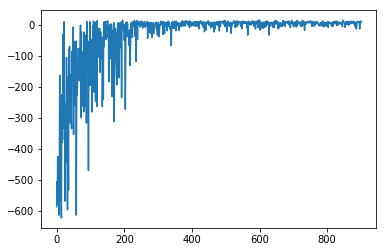

In [5]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,agent))
    
    agent.epsilon *= 0.999
    
    if i %100 ==0:
        clear_output(True)
        print (agent.epsilon)
        plt.plot(rewards)
        plt.show()
        

In [7]:
from evsarsa import EvSarsaAgent

In [8]:
new_agent =  EvSarsaAgent(alpha=0.8,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

0.014927707529619883


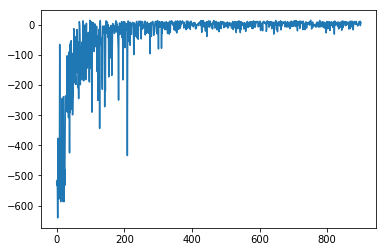

In [9]:
rewards = []
for i in range(1000):
    rewards.append(play_and_train(env,new_agent))
    
    agent.epsilon *= 0.999
    
    if i %100 ==0:
        clear_output(True)
        print (agent.epsilon)
        plt.plot(rewards)
        plt.show()
        

# Main assignment

Use agent to train efficiently on CartPole-v0

This environment has a continuous number of states, so you will have to group them into bins somehow.

The simplest way is to use `round(x,n_digits)` (or numpy round) to round real number to a given amount of digits.

The tricky part is to get the n_digits right for each state to train effectively.

Note that you don't need to convert state to integers, but to __tuples__ of any kind of values.

In [10]:
#run xvfb and set %env DISPLAY=:1 if in binder or on a server
env = gym.make("CartPole-v0")
n_actions = env.action_space.n

print("first state:%s"%(env.reset()))
#plt.imshow(env.render('rgb_array'))

[2017-10-10 16:33:42,382] Making new env: CartPole-v0


first state:[-0.03612696  0.04373616 -0.00068808  0.01282505]


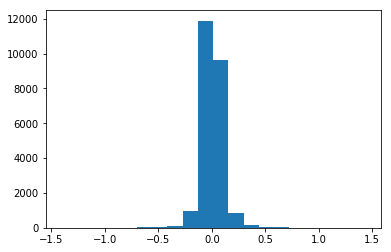

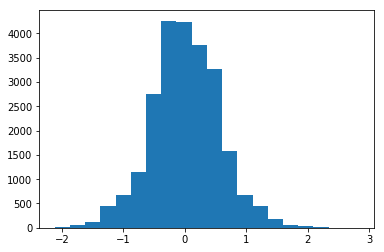

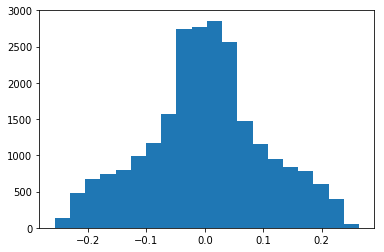

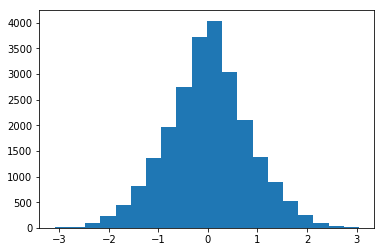

In [11]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s,r,done,_ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    
    plt.hist(all_states[:,obs_i],bins=20)
    plt.show()

In [12]:
n_digits = 2

In [13]:
from gym.core import ObservationWrapper
class Binarizer(ObservationWrapper):
    
    def _observation(self,state):    
        
        #state = <round state to some amount digits.>
        #hint: you can do that with round(x,n_digits)
        #you will need to pick a different n_digits for each dimension
        
        #state = np.round(state,n_digits)#
        state = [round(s, n_digits[i]) for i,s in enumerate(state)]
        
        
        
        
        return tuple(state)

In [14]:
n_digits = [1,1,1,1]

In [15]:
env = Binarizer(gym.make("CartPole-v0"))


[2017-10-10 16:33:45,599] Making new env: CartPole-v0


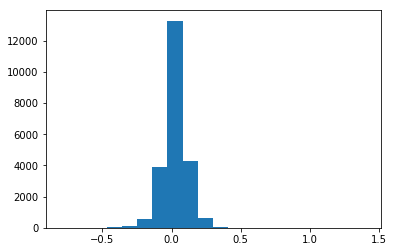

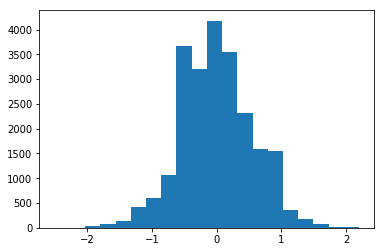

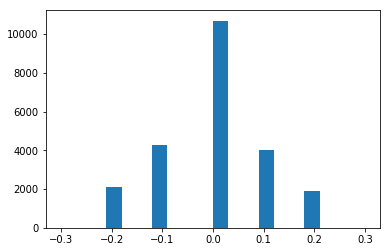

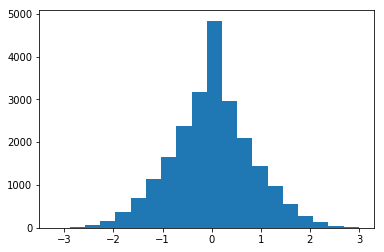

In [16]:
all_states = []
for _ in range(1000):
    all_states.append(env.reset())
    done = False
    while not done:
        s,r,done,_ = env.step(env.action_space.sample())
        all_states.append(s)
        if done:break
            
all_states = np.array(all_states)

for obs_i in range(env.observation_space.shape[0]):
    
    plt.hist(all_states[:,obs_i],bins=20)
    plt.show()



In [26]:
agent = QLearningAgent(alpha=0.8,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

mean reward 122.29


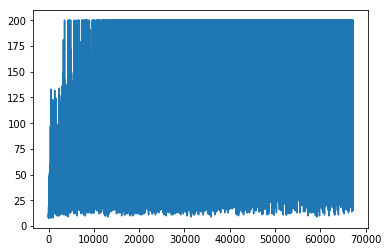

KeyboardInterrupt: 

In [27]:
rewards = []
for i in range(10**6):
    rewards.append(play_and_train(env,agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()
        


In [19]:
from evsarsa import EvSarsaAgent

In [23]:
new_agent = EvSarsaAgent(alpha=0.5,epsilon=0.1,discount=0.99,
                       getLegalActions = lambda s: range(n_actions))

mean reward 171.51


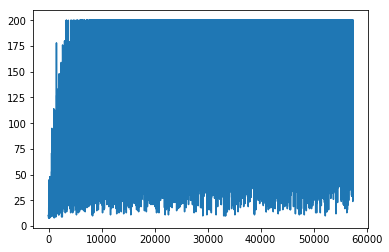

KeyboardInterrupt: 

In [24]:
rewards = []
for i in range(10**6):
    rewards.append(play_and_train(env,new_agent))    
    if i %100 ==0:
        clear_output(True)
        print ("mean reward",np.mean(rewards[-100:]))
        plt.plot(rewards)
        plt.show()

